# Data Science 03: Inženýrství příznaků (Feature Engineering)

In [1]:
# Instalace potřebných knihoven
#%pip instal pandas
#%pip install numpy

#%pip install scipy

#%pip install seaborn

In [2]:
# Import potřebných knihoven
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [3]:
# Soubor je načten a přiřazen do proměnné ‚df‘
path='../../data/raw/exploration_timelaps.csv'
df = pd.read_csv(path)
df.head()

,id,type_brick,time_start,time_verif,time_dest,time_end,time_start_sec,time_verif_sec,time_dest_sec,time_end_sec,type,start_to_verif,verif_to_dest,dest_to_end,total_time,total_time_binned,brick_basic,brick_corner,brick_end,brick_half
0,1,CORNER,13:52:18,13:52:24,13:52:42,13:52:58,49938,49944,49962,49978,2,6,18,16,40,Very short,False,True,False,False
1,2,HALF,13:52:58,13:53:02,13:53:18,13:53:36,49978,49982,49998,50016,3,4,16,18,38,Very short,False,False,False,True
2,4,BASIC,13:56:00,13:56:06,13:56:20,13:56:36,50160,50166,50180,50196,1,6,14,16,36,Extremely short,True,False,False,False
3,6,BASIC,13:58:10,13:58:16,13:58:30,13:58:46,50290,50296,50310,50326,1,6,14,16,36,Extremely short,True,False,False,False
4,9,BASIC,14:00:34,14:00:42,14:00:54,14:01:18,50434,50442,50454,50478,1,8,12,24,44,Short,True,False,False,False


### Analýza vzorců jednotlivých příznaků prostřednictvím grafické vizualizace

#### Výpočet korelace mezi proměnnými

In [4]:
df[['type', 'start_to_verif', 'verif_to_dest', 'dest_to_end', 'total_time']].corr()

,type,start_to_verif,verif_to_dest,dest_to_end,total_time
type,1.000000,-0.003512,0.245297,-0.054473,0.061875
start_to_verif,-0.003512,1.000000,-0.287021,-0.360210,-0.009296
verif_to_dest,0.245297,-0.287021,1.000000,0.000781,0.342666
dest_to_end,-0.054473,-0.360210,0.000781,1.000000,0.831654
total_time,0.061875,-0.009296,0.342666,0.831654,1.000000


(0.0, 66.09946446883836)

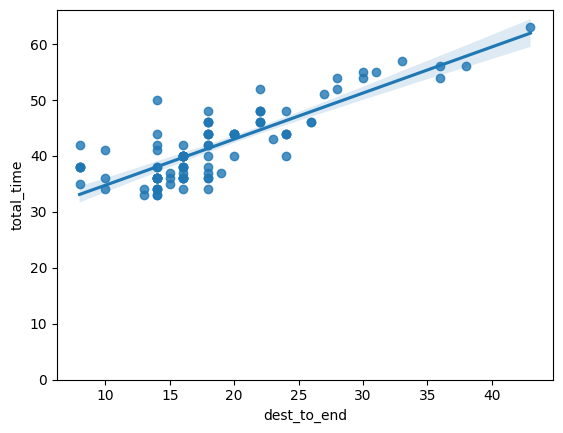

In [5]:
# 'dest_to_end' jako potenciální prediktor 'total_time'
sns.regplot(x="dest_to_end", y="total_time", data=df)
plt.ylim(0,)

### Analýza kategorických proměnných

<Axes: xlabel='type_brick', ylabel='total_time'>

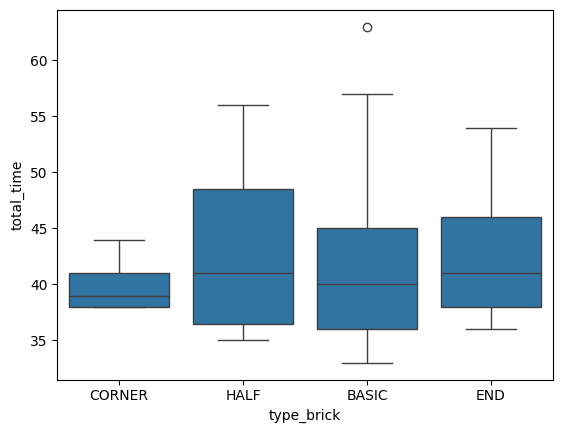

In [6]:
# Vztah mezi proměnnými ‚type‘ a ‚total_time‘
sns.boxplot(x='type_brick', y="total_time", data=df)

### Deskriptivní statistická analýza dat

In [7]:
df.describe()

,id,time_start_sec,time_verif_sec,time_dest_sec,time_end_sec,type,start_to_verif,verif_to_dest,dest_to_end,total_time
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,68.656863,53095.647059,53103.901961,53118.941176,53137.284314,1.303922,8.254902,15.039216,18.343137,41.637255
std,36.495353,2852.271152,2852.560429,2851.900259,2851.193613,0.793404,3.204842,3.143189,6.560450,6.503296
min,1.000000,48679.000000,48685.000000,48703.000000,48725.000000,1.000000,4.000000,7.000000,8.000000,33.000000
25%,39.250000,50540.250000,50548.250000,50565.250000,50581.250000,1.000000,6.000000,14.000000,14.000000,36.000000
50%,66.500000,51696.000000,51703.000000,51716.000000,51737.000000,1.000000,8.000000,14.500000,16.000000,40.000000
75%,100.750000,55791.000000,55798.250000,55815.000000,55829.500000,1.000000,8.000000,16.000000,21.500000,45.500000
max,136.000000,57449.000000,57466.000000,57473.000000,57483.000000,4.000000,20.000000,24.000000,43.000000,63.000000


#### Výpočet četnosti jednotlivých hodnot

In [8]:
df['type_brick'].value_counts()

type_brick
BASIC     87
HALF       6
END        5
CORNER     4
Name: count, dtype: int64

In [9]:
df['type_brick'].value_counts().to_frame()

,count
type_brick,
BASIC,87
HALF,6
END,5
CORNER,4


### Seskupování dat

In [10]:
df['type_brick'].unique()

array(['CORNER', 'HALF', 'BASIC', 'END'], dtype=object)

In [11]:
df_group_one = df[['type_brick', 'total_time']]
df_group_one

,type_brick,total_time
0,CORNER,40
1,HALF,38
2,BASIC,36
3,BASIC,36
4,BASIC,44
...,...,...
97,BASIC,41
98,BASIC,33
99,BASIC,33
100,BASIC,37


In [12]:
# Výpočet průměrné hodnoty času pro jednotlivé kategorie dat
df_group_one = df_group_one.groupby(['type_brick'], as_index=False).mean()
df_group_one

,type_brick,total_time
0,BASIC,41.528736
1,CORNER,40.000000
2,END,43.000000
3,HALF,43.166667


<span style='color:brown'>
<h4>Vztah mezi korelací a kauzalitou</h4>
<p><b>Korelace</b>: míra vzájemné závislosti mezi proměnnými.</p>
<p><b>Kauzalita</b>: vztah příčiny a následku mezi dvěma proměnnými.</p>
</span>

<span style='color:brown'>
<h4>Pearsonova korelace</h4>
<p>Pearsonův korelační koeficient měří lineární závislost mezi dvěma proměnnými X a Y.</p>
<p>Výsledný koeficient nabývá hodnot v intervalu od -1 do 1, kde:</p>
<ul>
    <li><b>1</b>: Dokonalá kladná lineární korelace.</li>
    <li><b>0</b>: Žádná lineární korelace, proměnné se pravděpodobně lineárně neovlivňují.</li>
    <li><b>-1</b>: Dokonalá záporná lineární korelace.</li>
</ul>
</span>

In [13]:
corr = df[['type', 'start_to_verif', 'verif_to_dest', 'dest_to_end', 'total_time']].corr()

<Axes: >

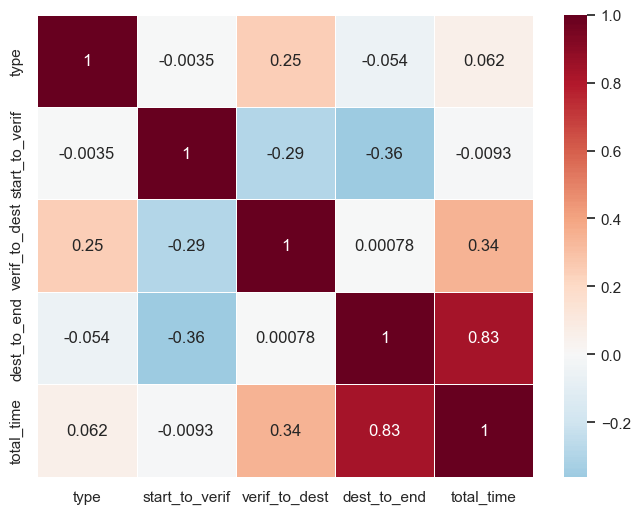

In [14]:
# Teplotní mapa (heatmapa)
sns.set_theme(style="white")

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap="RdBu_r",
    center=0,
    linewidths=0.5
)

<span style='color:brown'>
<b>P-value</b>
<p>P-hodnota (P-value) představuje pravděpodobnost, že korelace mezi dvěma proměnnými je statisticky významná. Obvykle se volí hladina významnosti 0,05, což znamená, že s 95% jistotou považujeme korelaci mezi proměnnými za statisticky významnou.</p>

<p>Podle běžně používané konvence platí, že pokud:</p>
<ul>
    <li>p-hodnota je < 0,001: existuje silný důkaz, že korelace je statisticky významná.</li>
    <li>p-hodnota je < 0,05: existuje středně silný důkaz, že korelace je statisticky významná.</li>
    <li>p-hodnota je < 0,1: existuje slabý důkaz, že korelace je statisticky významná.</li>
    <li>p-hodnota je > 0,1: neexistuje důkaz o statistické významnosti korelace.</li>
</ul>
</span>

#### 'dest_to_end' vs. 'total_time'

In [15]:
# Výpočet Pearsonova korelačního koeficientu a odpovídající p-hodnoty mezi proměnnými ‚dest_to_end‘ a ‚total_time‘
pearson_coef, p_value = stats.pearsonr(df['dest_to_end'], df['total_time'])
print("Pearsonov korelační koeficient = ", pearson_coef, ".  P-value =", p_value)

Pearsonov korelační koeficient =  0.8316539386073389 .  P-value = 2.6999302925476424e-27


Protože p-hodnota je < 0,001, korelace mezi proměnnými ‚dest_to_end‘ a ‚total_time‘ je statisticky významná a lineární vztah je středně silný

### Analýza rozptylu (ANOVA) pro porovnání skupinových průměrů

<span style='color:brown'>
<p><b>Analýza rozptylu (ANOVA)</b> je statistická metoda používaná k ověření, zda existují statisticky významné rozdíly mezi průměry dvou nebo více skupin. ANOVA vrací dva základní parametry:</p>

<p><b>F-statistika (F-test)</b>: ANOVA předpokládá, že průměry všech skupin jsou stejné, a následně vyhodnocuje, jak moc se skutečné průměry od tohoto předpokladu odchylují. Tato odchylka je vyjádřena hodnotou F-statistiky. Vyšší hodnota znamená větší rozdíl mezi skupinovými průměry.</p>

<p><b>P-hodnota</b>: P-hodnota udává, jak statisticky významná je vypočtená hodnota F-statistiky.</p>

<p>Pokud je analyzovaná proměnná silně korelována s vysvětlovanou proměnnou, očekáváme, že ANOVA vrátí vysokou hodnotu F-statistiky a nízkou p-hodnotu.</p>
</span>

In [16]:
# provedeme seskupení dat podle jednotlivých kategorií
grouped_test = df[['type_brick', 'total_time']].groupby('type_brick')
grouped_test.head()

,type_brick,total_time
0,CORNER,40
1,HALF,38
2,BASIC,36
3,BASIC,36
4,BASIC,44
5,BASIC,34
6,BASIC,34
10,END,46
21,HALF,36
22,CORNER,38


In [17]:
grouped_test.get_group('BASIC')['total_time']

2      36
3      36
4      44
5      34
6      34
       ..
97     41
98     33
99     33
100    37
101    34
Name: total_time, Length: 87, dtype: int64

#### BASIC a HALF

In [18]:
f_val, p_val = stats.f_oneway(grouped_test.get_group('BASIC')['total_time'], grouped_test.get_group('HALF')['total_time'])

print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 0.3421926095127691 , P = 0.5600140178204602


Výsledky analýzy ANOVA pro kategorie `BASIC` a `HALF` vykazují p-hodnotu vyšší než 0,1, což znamená, že F-statistika není statisticky významná. Nelze tedy zamítnout nulovou hypotézu o shodě průměrů obou skupin a nelze potvrdit statisticky významný rozdíl mezi nimi.

### Závěr: Identifikace významných proměnných

<p>Na základě provedené analýzy byly identifikovány následující významné proměnné:</p>

<ul>
    <li>total_time</li>
    <li>start_to_verif</li>
    <li>verif_to_dest</li>
    <li>dest_to_end</li>
</ul>

### Export datové sady do formátu CSV

In [19]:
df_ready = df[['id', 'type_brick', 'type', 'start_to_verif', 'verif_to_dest', 'dest_to_end', 'total_time']]

In [20]:
df_ready.to_csv('../../data/raw/ready_timelaps.csv', index=False)

### Autor / Organizace / Datum

Vjačeslav Usmanov, ČVUT v Praze, Fakulta stavební

###### Přehled změn


|  Datum (YYYY-MM-DD) |  Verze | Autor změny  |  Popis změny |
|---|---|---|---|
| 2026-01-21 | 1.1 | Vjačeslav Usmanov| added DS_03_Features.ipynb |
| 2026-02-12 | 1.2 | Vjačeslav Usmanov| changed DS_03_Features.ipynb |